  SWMAL Opgave

## Dataanalyse

(the following segment has been translated from danish to english by chat-gpt)
### Qa) Description of dataset for O4 project

For our O4 project, we have chosen to work with image recognition. We will develop a model capable of analyzing and identifying different weather conditions in images. These conditions can be Cloudy, Rainy, Sunny, or Sunrise. To achieve this goal, we will use a classification method where images are categorized so that our model can be trained to predict the weather when presented with a new image.

We are facing a multi-class image classification task as there are four different weather conditions to be recognized. This task will be accomplished using supervised learning, where we train our model using a dataset.

To create this model, we have obtained data from Kaggle, which is a platform that provides large datasets. We have a dataset consisting of approximately 1200 images divided into the 4 categories. There will be around 300 samples per category to train/test our model. These samples consist of different images, each illustrating one of the four weather categories: Sunny, Rainy, Cloudy, and Sunrise, which will be our target values.

Therefore, the dataset will be divided into three sets: a training set to train the model, a validation set to fine-tune model parameters and test performance, and a test set for the final evaluation of the model.

When working with image recognition, it can be somewhat challenging to identify errors in the data. Potential errors and uncertainties may arise in terms of lighting, angles of view, or other factors that will affect the quality of the images. It's also possible that one of the images ended up in the wrong category in the training set, meaning there are errors in the labels. In this way, our model will not be trained correctly to predict our target values. Therefore, a data analysis of our dataset will be conducted to identify corrupt data.

This project aims to develop an image recognition model to identify weather conditions in images using supervised learning.

### Qb) Data Analysis of our own dataset
Here, the data analysis is set up as explained at the end of this task. for my merge conf?

In [ ]:
#make function to fetch dataset

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return images, labels




Der er implementeret en funktion getDataSet(), som tager en liste med kategorier og en string, som er navnet på mappen. 
Den vil give hvert image et label baseret på kategori, og index. Derudover vil den præprocesserer billederne, og sorterer de korrupte filer fra.

Data              dataanalyse.ipynb pipelines.ipynb   weather_dataset


Failed to load image: weather_dataset/Shine/shine131.jpg
Failed to load image: weather_dataset/Rain/rain141.jpg


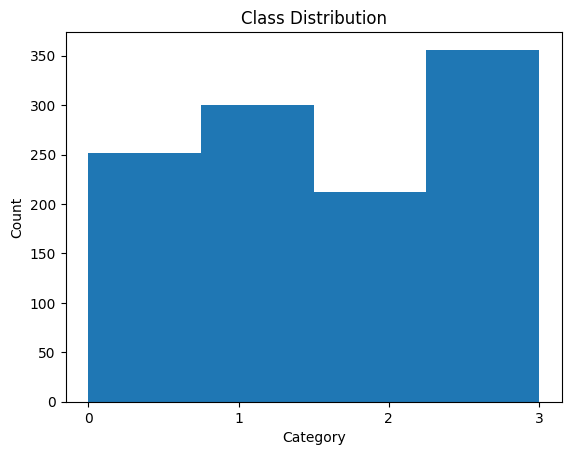

Category for image 0: Shine


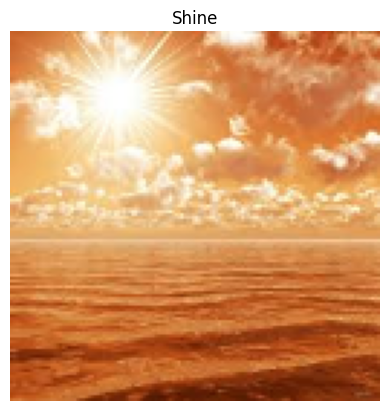

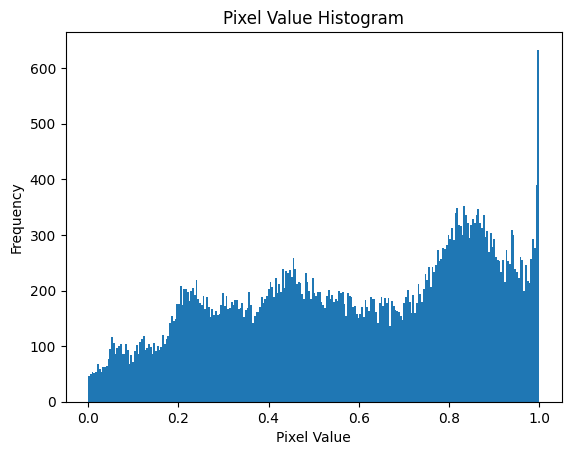

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

! ls
# ! dir
data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]


images, labels = getDataSet(categories, data_folder)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(labels, bins=len(np.unique(labels)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(labels))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[labels[0]]}")
  
plt.imshow(images[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
plt.title(categories[labels[0]])
plt.show()

plt.hist(images[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

Der er lavet to histogrammer. Et til at give en oversigt over hvor meget data, der er til hver kategori, og et til at vise pixel feature på et billede. 

Efter frafiltreringen af de billeder der ikke kunne loades ses det på histogrammet, at der er mellem 200-350 billeder inden for hver kategori. Dette vurderer vi til at være en tilstrækkelig mængde af hver kategori til at kunne træne en billedgenkender og stadig have 100 billeder tilovers til testing. 

Der er valgt at lave et histogram for image[0], som hører under kategorien "Shine". 
På dette histogram kan vi se hvordan frekvens af pixels på billedet er fordelt ud over pixel value 0-1. 
Pixel value viser hvor mørke eller lyse farverne på pixelsne er, hvor 0 er helt mørkt og 1 er helt hvidt. 

På histogrammet ser vi, at der er størst frekvens ved Pixel value 1, samt at frekvensen stiger mere value. Dette giver god mening, da billedet skal repræsentere Shine, som gerne skulle være meget lyst. 
Histogrammet stemmer derfor overens med billedet.